In [89]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv1D, MaxPool1D
from tensorflow.keras.optimizers.legacy import Adam

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler    # in order to scale data
from sklearn.metrics import classification_report,accuracy_score


import warnings as wr
wr.filterwarnings("ignore")

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

* 492 frauds out of 284,807 transactions
* features V1 - V28 are a result of the PCA transformation and are simply numerical representations
* "Amount" is the value in dollars of the transaction
* "Time" variable is the amount of time that passed from the time when the first transaction took place.
* Fraud = 1 , Not Fraud = 0


In [47]:
data = pd.read_csv("/Users/tabish/Downloads/creditcard.csv")
data.head(20)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [48]:
data.shape

(284807, 31)

In [49]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [51]:
data.Class.values

array([0, 0, 0, ..., 0, 0, 0])

In [52]:
data.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

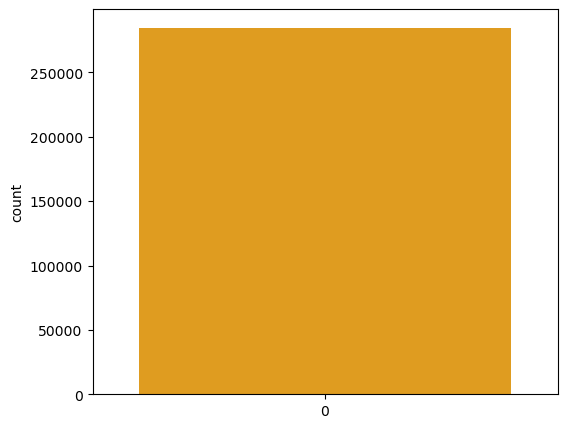

In [53]:
plt.figure(figsize = (6,5))
sns.countplot(data.Class, color = "orange")
plt.show()

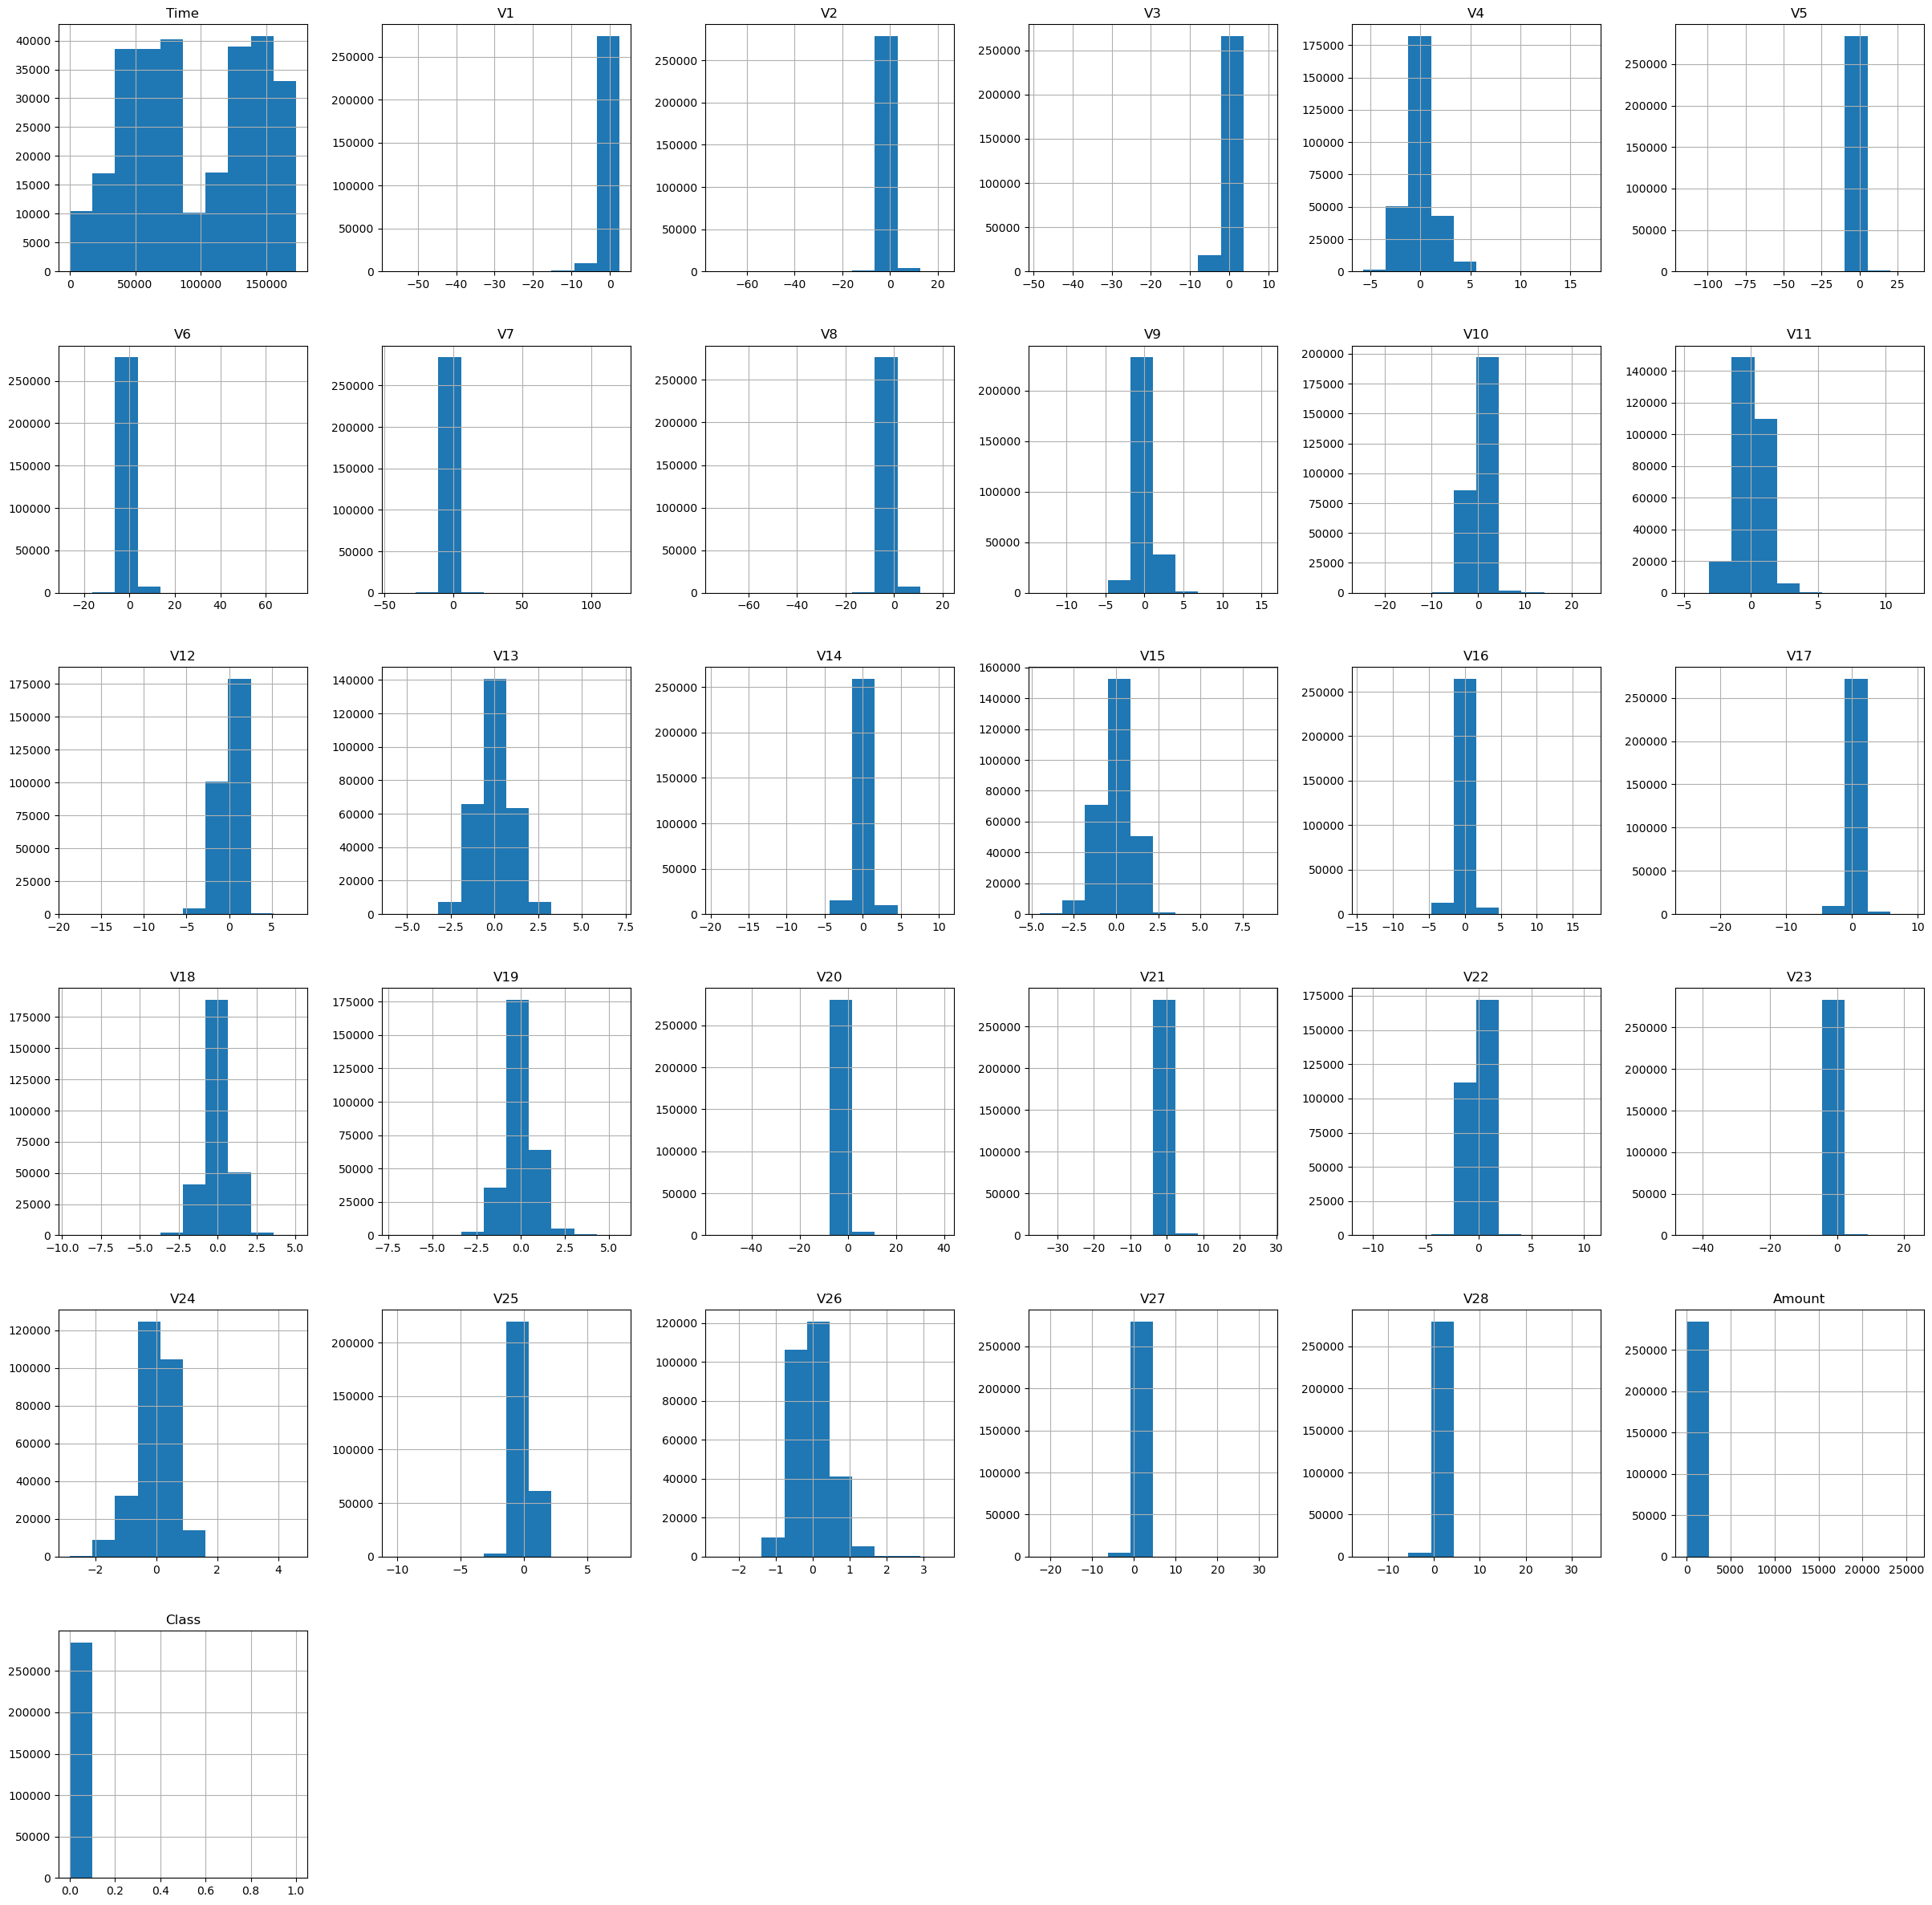

In [54]:
data.hist(figsize=(30,30))
plt.show()

In [55]:
fraud = data[data.Class == 1]

In [56]:
fraud             # Each row with class = 1

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


In [57]:
non_fraud = data[data.Class == 0]

In [58]:
non_fraud           # Each row with class = 0

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [59]:
print("Shape of fraud data:", fraud.shape)
print("Shape of non-fraus data:", non_fraud.shape)

Shape of fraud data: (492, 31)
Shape of non-fraus data: (284315, 31)


# Balancing the Dataset

In [60]:
nan_fraud_balanced = non_fraud.sample(4000)

In [61]:
nan_fraud_balanced

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
243033,151762.0,-0.778511,1.945519,1.510590,4.061792,0.495351,1.556756,0.031654,0.878149,-2.361339,...,-0.468216,-1.438887,-0.010282,0.178485,-0.054966,-0.033149,0.206784,0.088597,2.38,0
30427,35917.0,1.048599,-0.672839,0.925315,0.054948,-0.901186,0.600389,-0.815120,0.383949,1.055242,...,-0.152318,-0.325758,0.019284,-0.236217,0.036757,0.971400,-0.035395,0.005092,60.00,0
213557,139303.0,-3.344565,-9.266459,-3.848607,2.344124,-2.884145,1.203589,3.133699,-0.537317,0.614168,...,1.255939,-2.604199,-1.982688,0.386006,-1.615226,-0.174300,-0.578765,0.426425,2775.17,0
149002,90436.0,-0.454575,1.868660,0.725195,4.402947,0.596550,0.972942,0.507190,0.422904,-1.617414,...,0.288570,0.838790,-0.088341,0.725700,-0.150595,0.480812,-0.020833,0.092969,67.23,0
220849,142322.0,-0.919137,1.293198,0.507683,1.075406,-0.455738,0.480307,-0.280286,1.083821,-0.212349,...,-0.286056,-0.898578,0.212302,-0.485290,-0.804614,-1.007927,-0.117846,0.066965,20.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61323,49773.0,-1.383150,1.437442,0.753598,0.262169,-0.897377,-0.664254,-0.215204,0.909885,0.103690,...,0.022580,0.188081,-0.081744,0.432645,-0.062690,0.374005,0.223955,0.118959,9.99,0
282401,170874.0,-0.380328,0.906425,0.128659,-0.349268,1.017911,-0.326743,1.148586,-0.107276,-0.213096,...,0.110097,0.464155,-0.246243,0.577580,0.083657,0.387463,0.099644,0.177782,44.95,0
220878,142334.0,-2.522031,2.364975,-4.629345,-1.239828,1.510818,3.293710,-2.289048,0.127935,-1.164018,...,-1.086817,0.117518,0.619982,0.606123,-0.770872,0.201709,-1.036351,-0.298619,19.09,0
177301,123119.0,-6.102241,-8.125179,2.565633,-0.186807,4.955995,-3.473588,-4.584226,0.988630,0.314604,...,0.831642,0.180307,1.453127,-0.345083,1.048390,-0.128731,-0.021069,0.266074,254.52,0


In [62]:
balanced_data = fraud.append(nan_fraud_balanced, ignore_index = True)

In [63]:
balanced_data     # 492 of them Class = 1 (fraud), 492 of them Class = 0 (nan_fraud)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
1,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
2,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
3,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
4,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4487,49773.0,-1.383150,1.437442,0.753598,0.262169,-0.897377,-0.664254,-0.215204,0.909885,0.103690,...,0.022580,0.188081,-0.081744,0.432645,-0.062690,0.374005,0.223955,0.118959,9.99,0
4488,170874.0,-0.380328,0.906425,0.128659,-0.349268,1.017911,-0.326743,1.148586,-0.107276,-0.213096,...,0.110097,0.464155,-0.246243,0.577580,0.083657,0.387463,0.099644,0.177782,44.95,0
4489,142334.0,-2.522031,2.364975,-4.629345,-1.239828,1.510818,3.293710,-2.289048,0.127935,-1.164018,...,-1.086817,0.117518,0.619982,0.606123,-0.770872,0.201709,-1.036351,-0.298619,19.09,0
4490,123119.0,-6.102241,-8.125179,2.565633,-0.186807,4.955995,-3.473588,-4.584226,0.988630,0.314604,...,0.831642,0.180307,1.453127,-0.345083,1.048390,-0.128731,-0.021069,0.266074,254.52,0


In [64]:
balanced_data.Class.value_counts()

0    4000
1     492
Name: Class, dtype: int64

In [65]:
x = balanced_data.drop("Class", axis = 1)
x                                           # dataset without Class column

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.126911,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00
1,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,2.102339,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00
2,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.430022,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93
3,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,-0.171608,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00
4,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,0.009061,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4487,49773.0,-1.383150,1.437442,0.753598,0.262169,-0.897377,-0.664254,-0.215204,0.909885,0.103690,...,-0.074689,0.022580,0.188081,-0.081744,0.432645,-0.062690,0.374005,0.223955,0.118959,9.99
4488,170874.0,-0.380328,0.906425,0.128659,-0.349268,1.017911,-0.326743,1.148586,-0.107276,-0.213096,...,0.041701,0.110097,0.464155,-0.246243,0.577580,0.083657,0.387463,0.099644,0.177782,44.95
4489,142334.0,-2.522031,2.364975,-4.629345,-1.239828,1.510818,3.293710,-2.289048,0.127935,-1.164018,...,-0.188935,-1.086817,0.117518,0.619982,0.606123,-0.770872,0.201709,-1.036351,-0.298619,19.09
4490,123119.0,-6.102241,-8.125179,2.565633,-0.186807,4.955995,-3.473588,-4.584226,0.988630,0.314604,...,2.586419,0.831642,0.180307,1.453127,-0.345083,1.048390,-0.128731,-0.021069,0.266074,254.52


In [66]:
y = balanced_data.Class
y

0       1
1       1
2       1
3       1
4       1
       ..
4487    0
4488    0
4489    0
4490    0
4491    0
Name: Class, Length: 4492, dtype: int64

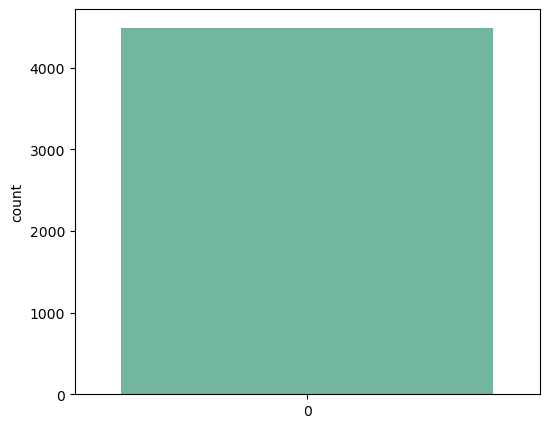

In [67]:
plt.figure(figsize = (6,5))
sns.countplot(y, palette="Set2")
plt.show()

# Training and Testing Part

In [68]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [69]:
xtrain.shape

(3593, 30)

In [70]:
xtest.shape

(899, 30)

# Standardation

In [71]:
scaler = StandardScaler()

In [72]:
scaled_xtrain = scaler.fit_transform(xtrain)
scaled_xtest = scaler.fit_transform(xtest)

In [73]:
scaled_xtrain

array([[-1.21374247, -1.34104424,  2.21421057, ...,  0.33367764,
         1.19078444,  0.04361872],
       [-1.8004871 , -0.32718309,  1.22050536, ...,  0.42674046,
         0.38631083, -0.34743959],
       [-0.65940659,  0.490191  , -0.10184775, ...,  0.02666977,
         0.01924341, -0.20097818],
       ...,
       [-0.57190298,  0.59388607, -0.6205582 , ...,  0.04490024,
         0.08581593, -0.13725016],
       [ 1.2467712 , -0.02463447,  0.50844391, ...,  1.18729094,
         1.34396047, -0.34825209],
       [-0.40367023, -0.09990756, -0.33530601, ...,  0.37355689,
         0.03302979,  0.02150468]])

In [74]:
type(scaled_xtrain)

numpy.ndarray

In [75]:
scaled_xtest

array([[-9.89077709e-01, -8.71573994e-02,  3.82388609e-01, ...,
         4.85596354e-02,  2.46458543e-01, -3.54095301e-01],
       [-5.85368202e-01,  4.77265568e-01, -2.99980322e-01, ...,
        -2.15865496e-02,  4.06505184e-04, -1.93159914e-01],
       [-1.10479062e+00, -2.11620909e-01,  6.63477196e-01, ...,
        -1.11318656e-01,  8.18041040e-02, -3.82933434e-01],
       ...,
       [-1.07493732e+00,  5.14829068e-01, -3.31035282e-02, ...,
        -6.11744882e-02,  1.30022601e-02, -3.82933434e-01],
       [-1.16359829e+00, -2.86801035e-01, -7.62339009e-02, ...,
         3.03368847e-01, -5.11417156e-01,  2.03274648e+00],
       [-6.16663999e-01,  5.43384262e-01, -5.72999749e-01, ...,
         1.01092682e-01, -2.46560537e-03, -3.86062499e-01]])

In [76]:
type(scaled_xtest)

numpy.ndarray

In [77]:
print(scaled_xtrain.shape)
print(scaled_xtest.shape)

(3593, 30)
(899, 30)


In [78]:
print(ytrain.shape)
print(ytest.shape)

(3593,)
(899,)


In [79]:
190820+93987 # Total dataset rows

284807

# 3D Format

In [80]:
scaled_xtrain3d = scaled_xtrain.reshape(scaled_xtrain.shape[0],scaled_xtrain.shape[1],1)
scaled_xtest3d = scaled_xtest.reshape(scaled_xtest.shape[0],scaled_xtest.shape[1],1)

scaled_xtrain3d.shape, scaled_xtest3d.shape

((3593, 30, 1), (899, 30, 1))

# CNN Implementation

In [81]:
# First Layer:

cnn = Sequential()
cnn.add(Conv1D(32, 2, activation = "relu", input_shape = (30,1)))
cnn.add(Dropout(0.1))

In [82]:
# Second Layer:

cnn.add(BatchNormalization()) # Batch normalization is a technique for training very deep neural networks 
                               # that standardizes the inputs to a layer for each mini-batch. This 
                               # has the effect of stabilizing the learning process and dramatically
                               # reducing the number of training epochs required to train deep networks

cnn.add(Conv1D(64, 2, activation = "relu"))
cnn.add(Dropout(0.2))          # prevents over-fitting (randomly remove some neurons)

In [83]:
# Flattening Layer:

cnn.add(Flatten())
cnn.add(Dropout(0.4))
cnn.add(Dense(64, activation = "relu"))
cnn.add(Dropout(0.5))

In [84]:
# Last Layer:

cnn.add(Dense(1, activation = "sigmoid"))

In [85]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 29, 32)            96        
                                                                 
 dropout_4 (Dropout)         (None, 29, 32)            0         
                                                                 
 batch_normalization_1 (Bat  (None, 29, 32)            128       
 chNormalization)                                                
                                                                 
 conv1d_3 (Conv1D)           (None, 28, 64)            4160      
                                                                 
 dropout_5 (Dropout)         (None, 28, 64)            0         
                                                                 
 flatten_1 (Flatten)         (None, 1792)              0         
                                                      

In [91]:
from keras.utils import plot_model
plot_model(cnn)

AttributeError: module 'pydot' has no attribute 'InvocationException'

In [ ]:
cnn.compile(optimizer = Adam(learning_rate=0.0001), loss = "binary_crossentropy", metrics = ["accuracy"])

In [ ]:
history = cnn.fit(scaled_xtrain3d, ytrain, epochs = 20, validation_data=(scaled_xtest3d, ytest), verbose=1)

In [ ]:
fig, ax1 = plt.subplots(figsize= (10, 5))
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train", "Test"], loc = "upper left")
plt.show()

In [ ]:
fig, ax1 = plt.subplots(figsize= (10, 5))
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Test"], loc = "upper left")
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
cnn_probs = cnn.predict(scaled_xtest3d)
cnn_predictions = (cnn_probs > 0.5).astype(int)
cm = confusion_matrix(ytest, cnn_predictions)
#confusion_matrix = confusion_matrix(ytest, cnn_predictions)
sns.heatmap(cm, annot=True, fmt="d", cbar = False)
plt.title("CNN Confusion Matrix")
plt.show()

In [ ]:
accuracy_score(ytest, cnn_predictions)

In [ ]:
from sklearn.metrics import precision_recall_fscore_support as score

In [ ]:
precision, recall, fscore, support = score(ytest, cnn_predictions)
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))